In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
seed(100)

In [3]:
df = pd.read_csv('./DATA/online_transaction_dataset_processed.csv')
attr = df.columns.tolist()
np.transpose(attr)

array(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='<U23')

In [4]:
df.head()

,Unnamed: 0,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [5]:
cols1 = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']

In [6]:
np.transpose(attr)

array(['Unnamed: 0', 'Administrative', 'Administrative_Duration',
       'Informational', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates',
       'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
       'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='<U23')

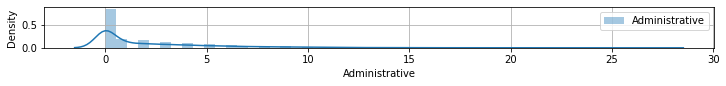

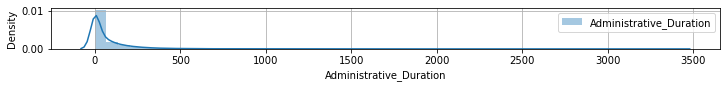

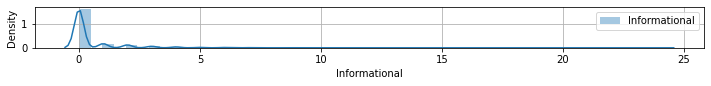

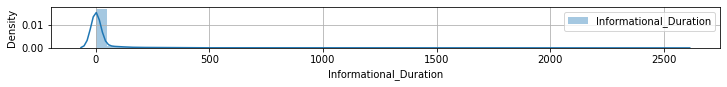

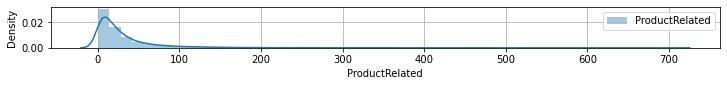

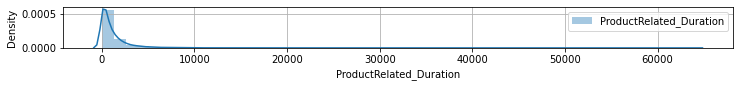

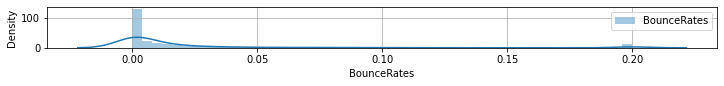

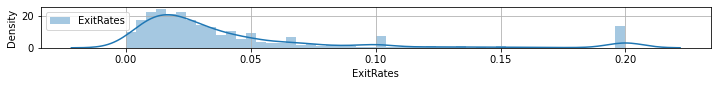

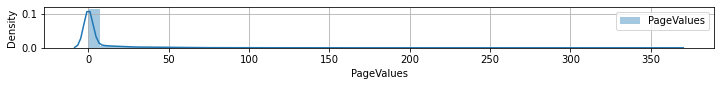

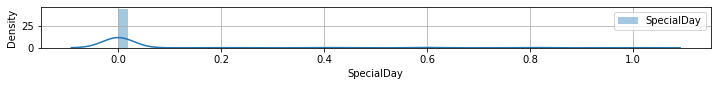

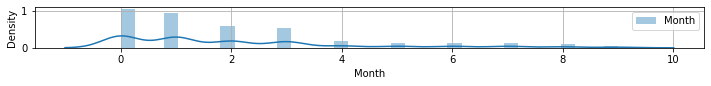

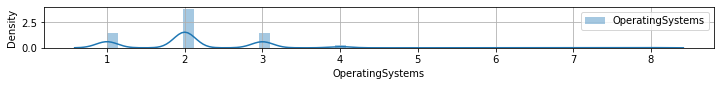

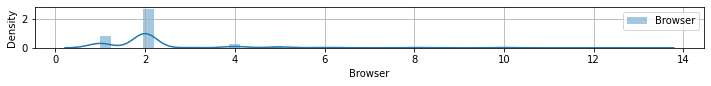

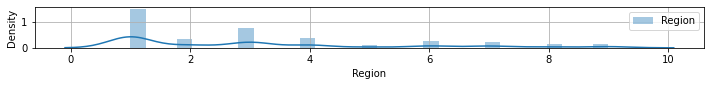

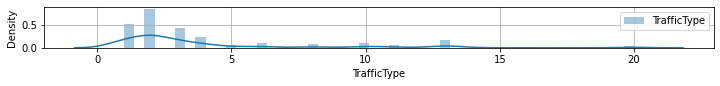

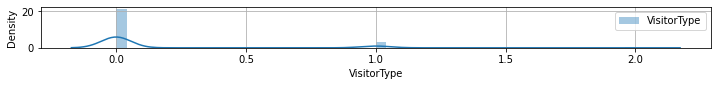

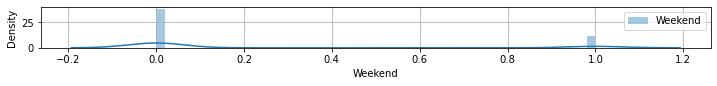

In [7]:
j = 1
for c in range(1, len(attr)-1):
    plt.figure(figsize=(12, 0.75))
    #df[attr[c]].hist(label=attr[c])
    sns.distplot(df[attr[c]], label=attr[c])
    plt.legend()
    plt.grid()
    plt.show()
    j += 1

In [8]:
df['Revenue'].value_counts()

0    10375
1     1908
Name: Revenue, dtype: int64

In [9]:
df['Month'].value_counts()

0    3357
1    2995
2    1884
3    1727
4     549
5     448
6     433
7     431
8     288
9     171
Name: Month, dtype: int64

In [10]:
df[attr[1:len(attr)]].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,9,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,9,2,2,1,2,0,0,0
2,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,9,3,2,2,4,0,0,0
3,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,9,3,3,1,4,0,1,0
4,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,9,2,2,1,3,0,0,0


In [11]:
np.transpose(attr[1:len(attr)]), attr[len(attr)-1]

(array(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated',
        'ProductRelated_Duration', 'BounceRates', 'ExitRates',
        'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser',
        'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
       dtype='<U23'),
 'Revenue')

In [12]:
df[attr[len(attr)-1]].value_counts()

0    10375
1     1908
Name: Revenue, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot


from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [14]:
x_tr, x_t, y_tr, y_t = train_test_split(df[attr[1:len(attr)-1]].values, df['Revenue'].values, random_state=100)

In [15]:
x_tr.shape, x_t.shape, y_tr.shape, y_t.shape

((9212, 17), (3071, 17), (9212,), (3071,))

In [16]:
#clf = svm.SVC()
#clf = DecisionTreeClassifier()
#clf = LogisticRegression()
clf = RandomForestClassifier()
clf.fit(x_tr, y_tr)
y_p = clf.predict(x_t)

In [17]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2621
           1       0.68      0.58      0.63       450

    accuracy                           0.90      3071
   macro avg       0.81      0.77      0.78      3071
weighted avg       0.89      0.90      0.90      3071



In [18]:
print(confusion_matrix(y_t, y_p))

[[2500  121]
 [ 190  260]]


In [19]:
y_p = clf.fit(x_tr, y_tr).predict(x_t)
clf_probs = clf.predict_proba(x_t)[:,1]
clf_fpr1, clf_tpr1, _ = roc_curve(y_t, clf_probs)
nc_fpr1, nc_tpr1, _ = roc_curve(y_t, np.zeros(len(y_t)))

In [20]:
def plt_roc_cure(clf_fpr, clf_tpr, nc_fpr, nc_tpr):
    plt.figure(figsize=(16,4))
    plt.plot(clf_fpr, clf_tpr, marker='d', 
         color='red', linestyle='--', 
         markersize=12, linewidth=2, 
         label='TPR-FPR with clf')
    plt.plot(nc_fpr, nc_tpr, marker='^',
        color='blue', linestyle='--',
        markersize=16, linewidth=3,
        label='TPR-FPR no clf')
    plt.legend()
    plt.show()

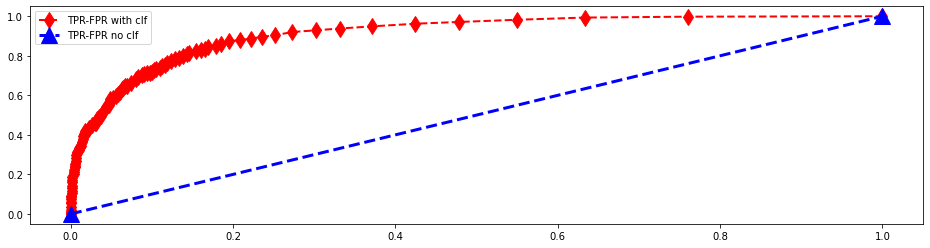

In [21]:
plt_roc_cure(clf_fpr1, clf_tpr1, nc_fpr1, nc_tpr1)

In [22]:
clfs = [LogisticRegression(), DecisionTreeClassifier(),  
        RandomForestClassifier(), GaussianNB(), GradientBoostingClassifier()]

In [23]:
color1= ['red', 'blue', 'green', 'magenta', 'black', 'yellow']
color2 = ['yellow', 'black', 'magenta', 'green', 'blue', 'red', 'purple']
marker1 = ['d', 'o', 's', '^', '*', '>', '<', 'h']


mrkSize = [4, 6, 8, 10, 24, 14, 16]

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
GaussianNB()
GradientBoostingClassifier()


Text(0.5, 1.0, 'ROC CURVES')

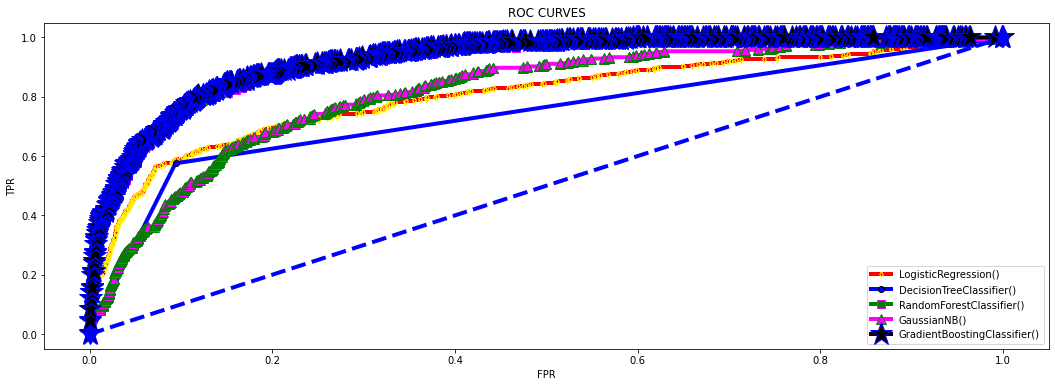

In [24]:
j = 0
plt.figure(figsize=(18,6))
for clf in clfs:
    print(clf)
    y_p = clf.fit(x_tr, y_tr).predict(x_t)
    clf_probs = clf.predict_proba(x_t)[:,1]
    clf_fpr1, clf_tpr1, _ = roc_curve(y_t, clf_probs)
    nc_fpr1, nc_tpr1, _ = roc_curve(y_t, np.zeros(len(y_t)))
    plt.plot(clf_fpr1, clf_tpr1, label= str(clf), 
             marker=marker1[j], markersize=mrkSize[j], 
             color=color1[j], markeredgecolor=color2[j],
            linewidth=4)
    plt.legend()
    j += 1

plt.plot(nc_fpr1, nc_tpr1, color='blue', marker='d', 
         markersize=mrkSize[j], linestyle='--', linewidth=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVES')

In [25]:
print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2621
           1       0.68      0.62      0.65       450

    accuracy                           0.90      3071
   macro avg       0.81      0.78      0.79      3071
weighted avg       0.90      0.90      0.90      3071



In [33]:
confusion_matrix(y_t, y_p)

array([[2491,  130],
       [ 173,  277]])

In [46]:
clf_probs

array([0.68222462, 0.03003092, 0.01783221, ..., 0.0413525 , 0.08005694,
       0.01511847])

In [51]:
y_p_dt = pd.DataFrame({'y_t':y_t, 'p1': clf_probs, 'y_p': y_p})
y_p_dt.head(100)

,y_t,p1,y_p
0,0,0.682225,1
1,0,0.030031,0
2,0,0.017832,0
3,0,0.008152,0
4,0,0.553392,1
...,...,...,...
95,0,0.005952,0
96,0,0.026163,0
97,0,0.017832,0
98,0,0.034425,0


In [52]:
y_p_dt.to_csv('check.csv', header=True)